# Исследование данных по продажам компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта**:
Провести исследовательский анализ данных и проверить гипотезы, которые могут помочь в прогнозе продаж игр на 2017 год. 

**План проекта**

 1. Загрузка и обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Портрет пользователя каждого региона
 5. Проверка гипотез
 6. Общий вывод

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display

## Загрузка данных

In [3]:
#считаем CSV-файл с данными с помощью библиотеки pandas и сохраним его в датафрейм

data = pd.read_csv('games.csv')

In [4]:
#выведем первые 20 строк датасета

data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Общая информация о датафрейме

In [5]:
#изучим общую информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что есть небольшое количество пропусков в строках с информацией о названии игр, о дате выпуска, о жанре игр.
Также, большое количество пропусков в данных с информацией о пользовательской оценке, оценке критиков и рейтингу ESRB.

Также у столбцов: год выпуска и пользовательская оценка имеют неподходящий тип данных.


## Предобработка данных

В этом разделе необходимо:

- Заменить названия столбцов;
- Преобразовать данные в нужные типы, с описанием причины замены;
- Обработать пропуски при необходимости, привести объяснение заполнения пропусков определённым образом;
- Описать причины, которые могли привести к пропускам;
- Обработать значения с аббревиатурой 'tbd' в столбце с оценкой пользователей;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.


### Замена названий столбцов

In [6]:
#приведем названия столбцов к нижнему регистру

data = data.rename(
    columns ={
        'Name': 'name', 
        'Platform': 'platform', 
        'Year_of_Release': 'year_of_release', 
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating',
    }
)

#проверим внесенные изменения
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

По общей информации о датафрейме заметили небольшое количество пропусков в строках с информацией о названии игр, о годе выпуска, о жанре игр.Также, большое количество пропусков в данных с информацией о пользовательской оценке, оценке критиков и рейтингу ESRB.

#### Обработка пропусков со значениями года релиза

In [7]:
#выведем количество пропусков со значениями года выпуска
print(data['year_of_release'].isna().sum())

#удалим строки с пропусками
data = data.dropna(subset=['year_of_release'])

#заменим тип данных на integer
data['year_of_release'] = data['year_of_release'].astype('int')

269


Так как размер данных с пропусками незначительно мал, можно удалить строки с пропусками с информацией о годе выпуска игр, так как эта информация важна для прогнозирования продаж и заполнить ее другими значениями на основе текущей таблицы нет возможности. 

Заменили тип данных на целые числа, так как визуально удобнее видеть год в виде числа без дробной части. 

Пропуски в данных могли возникнуть по причине неполного заполнения данных или по ошибке.

#### Обработка пропусков со значениями оценки пользователя

In [8]:
#выведем количество пропусков со значениями пользовательской оценки
print(data['user_score'].isna().sum())

print(data[data['user_score'] == "tbd"]['user_score'].count())

#заменим значения 'tbd' на пропуски
data['user_score'] = data['user_score'].replace('tbd', np.nan)

#заменим тип данных на float
data['user_score'] = data['user_score'].astype('float')

6607
2376


Видим большое количество пропусков с оценкой пользователя, эти данные могут быть полезны для дальнейшего исследования, оставили пропуски без изменений. Пропуски могут быть связаны с отсутствием оценки или большой давностью данных. 

"tbd" – это аббревиатура, которая означает фразу “To Be Determined”, то есть отсутствие рейтинга на данный момент. Это может быть связано с тем, что пока не достаточно отзывов для формирования конечной оценки, а также с большой давностью выпуска игры - данные могли потеряться или вообще не фиксироваться на тот момент.
Эти значения также заменили пропуски. 


#### Обработка пропусков со значениями оценки критиков

In [9]:
#выведем количество пропусков со значениями оценки критиков
print(data['critic_score'].isna().sum())

8463


Также большое количество пропусков с оценкой критиков, эти данные могут быть полезны для дальнейшего исследования, оставили пропуски без изменений. Пропуски могут быть связаны с отсутствием оценки или большой давностью данных.

In [12]:
#проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Обработка пропусков со значениями рейтинга

In [13]:
print(data['rating'].value_counts())
print(data['rating'].isna().sum())
data['rating'] = data['rating'].fillna('-1')


-1      6678
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64
0


### Добавление столбца с суммарными продажами

In [11]:
#добавим столбец с информацией о суммарных продажах во всех регионах
data['total_sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38


### Обработка дубликатов

Проведем обработку явных и неявных дубликатов

In [12]:
#проверим наличие дубликатов в датасете
data.duplicated().sum()

0

In [13]:
#проверим наличие неявных дубликатов, проверку проведем по имени, платформе и году релиза одновременно
subset1 = ['name', 'platform', 'year_of_release']
subset2 = ['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales']

data[data.duplicated(subset=subset1, keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,-1,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,-1,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Видим 2 дубликата, но есть данные по продажам в регионах, которые нужно объединить, так как информация о продажах могла вноситься в разные периоды времени и все данные важны для последующего анализа. 

In [14]:
#подготовим данные для обработки дубликатов
subset3 = ['name', 'platform', 'year_of_release']

multi_agg = {
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'total_sales': 'sum',
    'critic_score': 'mean',
    'user_score': 'mean',
    'rating': 'first',
    'genre': 'first'
}

#сохраним строки с агрегированными продажами в отдельный датасет
data_duplicated = data[data.duplicated(subset=subset1, keep=False)].groupby(subset3, dropna=False).agg(multi_agg).reset_index()

#удалим дубликаты
data = data.drop_duplicates(subset=subset1,keep = False)

#проверим проведенные действия со строками
data_duplicated

,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,genre
0,Madden NFL 13,PS3,2012,2.11,0.23,0.00,0.23,2.57,83.0,5.5,E,Sports
1,NaN,GEN,1993,1.78,0.53,0.03,0.08,2.42,NaN,NaN,-1,None


In [15]:
#добавим строки с агрегированными продажами обратно в датасет
data = data.append(data_duplicated, ignore_index=True)

#проверим изменения
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16439,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-1,0.01
16440,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,-1,0.01
16441,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,-1,0.01
16442,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E,2.57
16443,NaN,GEN,1993,None,1.78,0.53,0.03,0.08,NaN,NaN,-1,2.42


### Вывод
Выполнили предобработку данных, в ходе которой были внесены изменения в регистр названий столбцов, также были обработаны пропуски в данных:
- строки с пропусками в данных с годом релиза было решено опустить, такие пропуски могли быть упущены из-за давности данных, 
- пропуски с оценкой пользователя и критиков было решено оставить без изменений для последующего анализа, такие пропуски могли возникнуть также из-за давности данных или по ошибке логирования, 
- значения 'tbd' с оценкой пользователя (равноценно не поставленной оценке) заменили на пропуски для последующего анализа
- на пропуски в рейтинге ESRB поставили заглушку в виде значения -1 для последующего анализа, здесь пропуски могли возникнуть по причине того, что рейтинг используется только в регионах США и Канады, оставили заглушку для последующего анализа

Заменили тип данных в столбце с годом релиза с float на integer для визуального удобства

Добавили столбец с информацией о суммарных продажах во всех регионах, также обработали 2 неявных дубликата, заменив значения по продажам в регионах на суммарные. 


## Исследовательский анализ данных

Необходимо провести анализ в разных разрезах данных:

- Посмотреть, сколько игр выпускалось в разные годы, понять, важны ли все данные;
- Посмотреть на динамику продаж по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Понять, за какой характерный срок появляются новые и исчезают старые платформы;
- Определить актуальный период данных для анализа, которые помогут построить прогноз на 2017 год;
- Определить какие платформы лидируют по продажам, растут или падают, выбрать несколько потенциально прибыльных платформ;
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат;
- Определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы;
- Cоотнести выводы с продажами игр на других платформах;
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Распределение игр по году релиза

Определим, сколько игр выпускалось по годам, важны ли все данные для последующего анализа

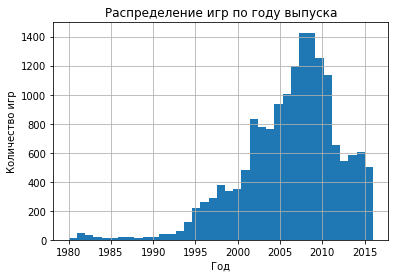

0.029615665288251034

In [17]:
#построим график распределения выпуска игр по годам
data['year_of_release'].hist(bins=37)

plt.title('Распределение игр по году выпуска')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

#проверим, какую долю всех данных занимают данные по выпуску игр до 1995 года
len(data.query('year_of_release < 1995')) / len(data)

In [18]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

По гистограмме видим, что компьютерные игры только набирали популярность в 80х-90х годах, видим несколько пиков на графике - в 2002, 2008-2009 и в 2015 годах. В эти годы были запущены платформы Xbox, PS2, Wii, PS3, Xbox 360 и 3DS, их запуск способствовал росту продаж игр.

Данные до 1995 года составляют примерно 3% от общего объема датасета, поэтому эти данные можно опустить. 

### Динамика продаж по платформам

Рассмотрим динамику продаж по платформам. 
Далее по платформам с наибольшими суммарными продажами построим распределение по годам.

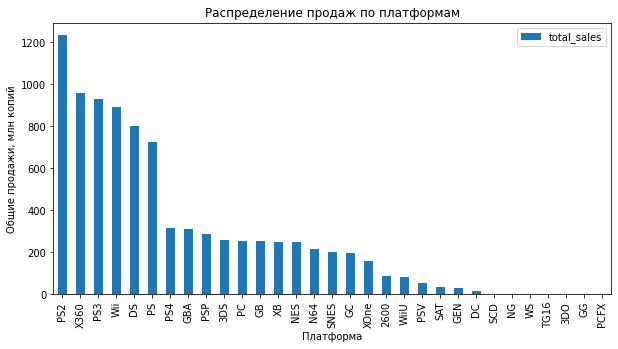

In [19]:
#Построим сводную таблицу по суммарным продажам по платформам
data_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')

#построим график распределения продаж по платформам
data_pivot.sort_values(by='total_sales', ascending=False).plot.bar(figsize=(10,5))

plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн копий')
plt.show()

Можно выделить топ-5 платформ с самыми высокими продажами: PS2, X360, PS3, Wii и DS, небольшими суммарными продажами обладают старые платформы: 3DO6 GG и PCFX были выпущены в 90х годах. 

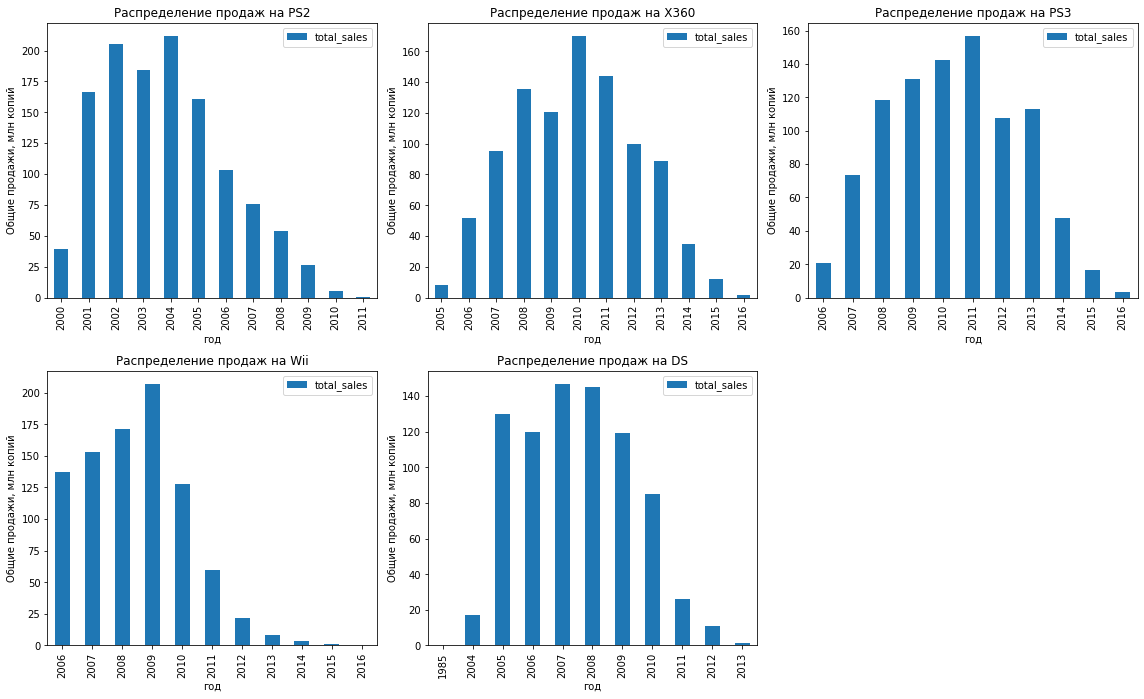

In [20]:
#построим графики распределения продаж по годам на топ-5 популярных платформ
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']


#готовим данные для построения графиков
i = 1
fig, ax = plt.subplots()

for pl in platforms: 
    ax = plt.subplot(3, 3, i)
    data.loc[data['platform'] == pl].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', ax=ax, figsize=(16, 14))
    i +=1
    plt.title(f'Распределение продаж на {pl}')
    plt.xlabel('год')
    plt.ylabel('Общие продажи, млн копий')   
fig.tight_layout()   
plt.show()  
         


По графику PS2 видим первые продажи с 2000 года, далее большой скачок в 2001 году с продажами около 160 млн копий, и спад продаж после 2005 года. Спад после 2005 года скорее всего связан с запуском преемника платформы PS3 и конкурентов X360.

X360: Медленный старт в 10 миллионов копий в 2005 году (одновременно с конкурентами PS3), пик продаж через 5 лет в 2010 году.

На графике продаж на платформе PS3 виден скачок после старта в 2007 году, делее пик продаж примерно также через 5 лет после запуска в 2011 году и спад после 

Большие объемы продаж на платформе Wii сразу на старте в 2006 году - около 130 млн копий, затем пик в 2009 году и спад после (в 2013 была прекращена продажа консолей на Wii)

### Расчет срока жизни платформ и выбор актуального периода для анализа

Проведем расчет срока жизни платформы, взяв медианное значение 

In [26]:
#построим сводную таблицу и посчитаем медиану
data_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
data_life['life'] = data_life['max'] - data_life['min'] + 1

data_life['life'].median()

7.0

Проведем расчет срока жизни платформы, взяв медианное значение, но по данным после 1995 года (не учитывая данные до старта роста продаж)

In [27]:
#построим сводную таблицу и посчитаем медиану
data_life_1995 = data.query('year_of_release > 1995').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
data_life_1995['life'] = data_life_1995['max'] - data_life_1995['min'] + 1

data_life_1995['life'].median()


7.0

Можно сделать вывод, что примерно каждые 7 лет выходят новые платформы и исчезают старые.

Выберем актуальные данные для анализа, учитывая, что для прогнозирования необходимо брать примерно 2-5 года 

In [28]:
#создадим срез данных с 2012 года
data_filtered = data.query('year_of_release > 2011')

### Анализ потенциально прибыльных платформ

Определим лидеров продаж, выберем потенциально прибыльные платформы для детального анализа

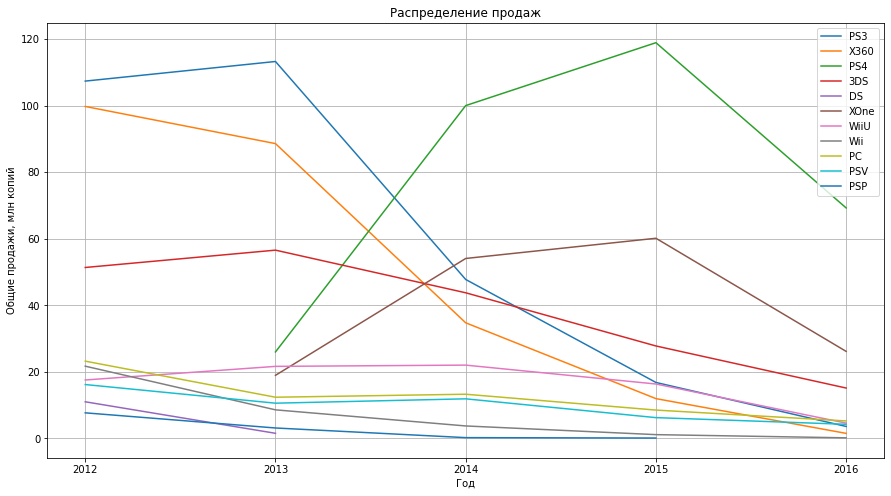

In [29]:
#построим линейный график по всем данным по платформам
fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
platforms = data_filtered['platform'].unique()

for pl in platforms: 
    ax = plt.gca()
    data_filtered.loc[data['platform'] == pl].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index().plot(x='year_of_release', y='total_sales', kind='line', ax=ax, figsize=(15, 8), grid=True)  

plt.legend(platforms)
plt.xlabel('Год')
plt.xticks(data_filtered['year_of_release'].unique())
plt.ylabel('Общие продажи, млн копий') 
plt.title(f'Распределение продаж')
plt.show()  

По графику можем заметить общую тенденцию на спад продаж к 2016 году по всем платформам, молодые платформы PS4 и Xone прошли пик продаж в 2015 году. Платформы PS3, X360, 3DS идут на убыль с 2013 года, но имеют достаточно высокие суммарные продажи.
Значения продаж по остальным платформам сравнительно давно идут на убыль, но выглядят стабильными последние 3 года

Рассчитаем медианные суммарные продажи по каждой платформе и выделим потенциально прибыльные 

In [30]:
data_filtered.pivot_table(index='platform', values='total_sales', aggfunc='median').reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales
9,X360,0.31
8,WiiU,0.22
10,XOne,0.22
4,PS4,0.20
3,PS3,0.20
7,Wii,0.18
0,3DS,0.11
2,PC,0.08
1,DS,0.05
6,PSV,0.05


Видим, что платформы X360, WiiU, XOne, PS4, PS3 имеют достаточно высокие по списку значения медианных суммарных продаж, можно считать их потенциально прибыльными на следующий год. 


### Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам

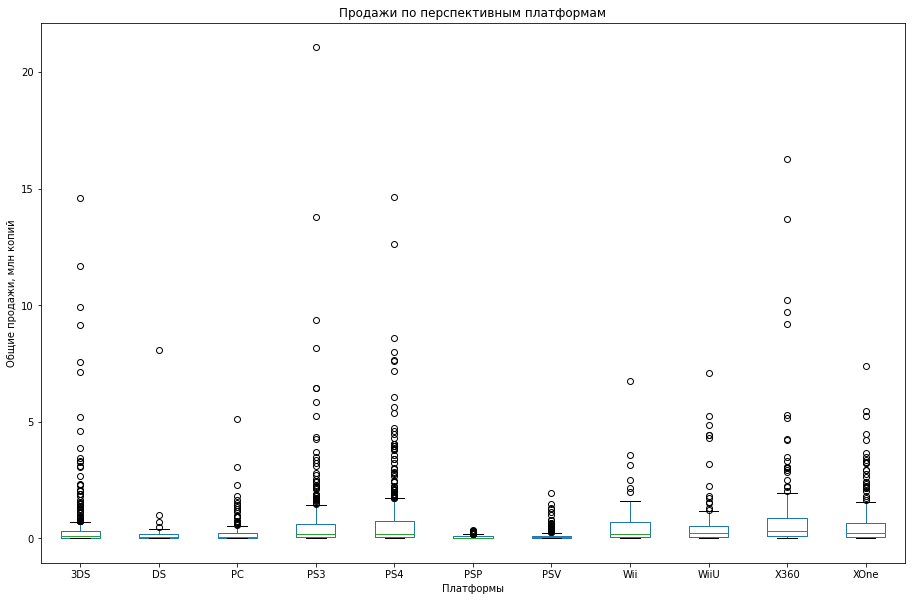

In [32]:
#построение графика
data_filtered.boxplot(by ='platform', column =['total_sales'], grid = False, figsize=(15, 10)).get_figure().suptitle('').get_figure().gca().set_title('Продажи по перспективным платформам')

plt.xlabel('Платформы')
plt.ylabel('Общие продажи, млн копий') 
plt.show()  

Видно большое количество вбросов данных с аномально высокими значениями продаж по платформам PS3, PS4, 3DS.
Построим масштабированную диаграмму с отображением медианы и квантиля 75%, по перспективным платформам 

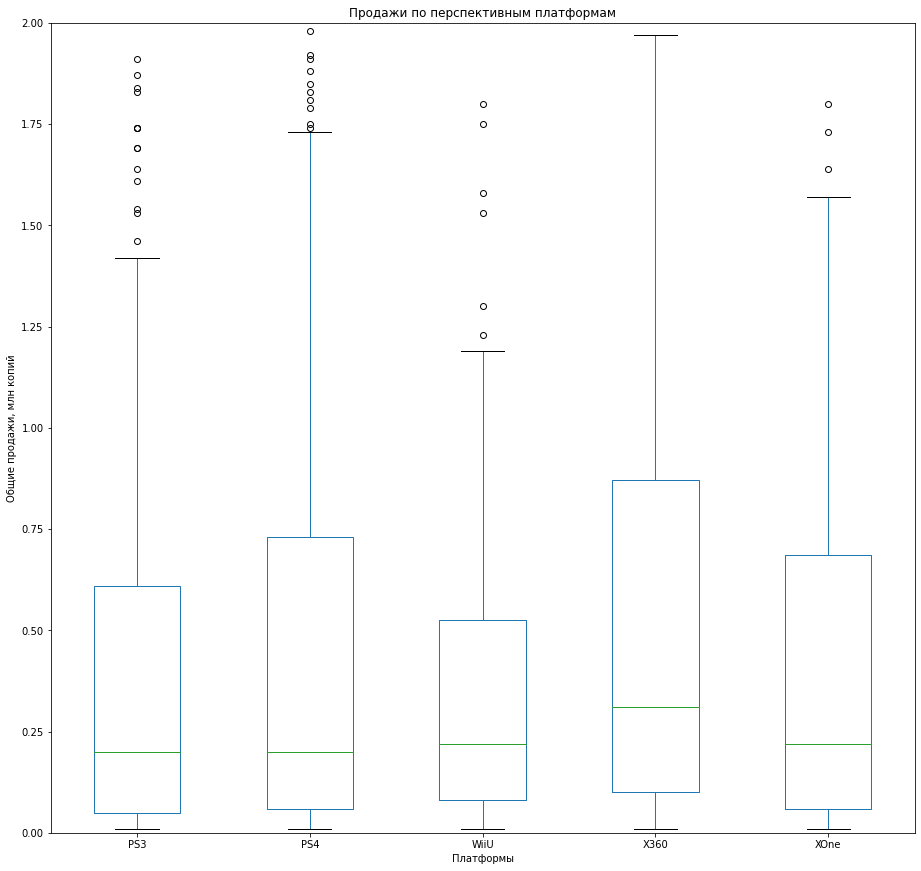

In [33]:
new_list = ['X360', 'WiiU', 'XOne', 'PS4', 'PS3']

data_filtered.query('platform in @new_list').boxplot(by ='platform', column =['total_sales'], grid = False, figsize=(15, 15)).get_figure().suptitle('').get_figure().gca().set_title('Продажи по перспективным платформам')

plt.xlabel('Платформы')
plt.ylim(0, 2)
plt.ylabel('Общие продажи, млн копий') 
plt.show()

Видим схожее значение медиан, платформа X360 лидирует по значению квантиля 75%, то есть внутри достаточно большой разброс значений продаж - от медианного 0,31 до примерно 0,8 млн копий лежит 50-75% продаж на данной платформе. 
Платформа WiiU показывает стабильные значения, с малым количеством вбросов аномальных значений продаж. 

### Влияние отзывов на продажи внутри платформ

Определим, есть ли корреляция между продажами и отзывами пользователей и критиков. 
Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

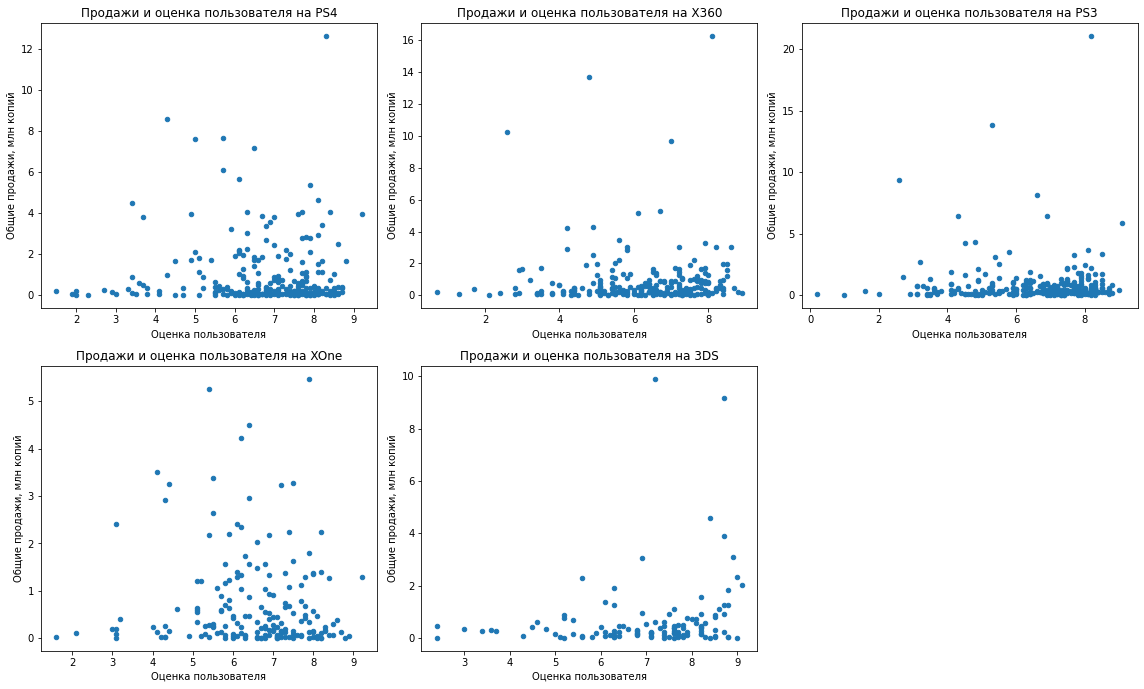

In [42]:
#построим диаграмму рассеяния для популярным платформам в зависимости от оценок пользователей и критиков
platforms = ['PS4', 'X360', 'PS3', 'XOne', '3DS']

#готовим данные для построения графиков
i = 1
fig, ax = plt.subplots()
for pl in platforms: 
    ax = plt.subplot(3, 3, i)
    data_filtered.loc[data['platform'] == pl].plot(x='user_score', y='total_sales', kind='scatter', ax=ax, figsize=(16, 14))
    i +=1
    plt.title(f'Продажи и оценка пользователя на {pl}')
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Общие продажи, млн копий')   
fig.tight_layout()      
plt.show()  
         


In [ ]:
#построим диаграмму рассеяния для популярным платформам в зависимости от оценок критиков
platforms = ['PS4', 'X360', 'PS3', 'XOne', '3DS']

#готовим данные для построения графиков
i = 1
fig, ax = plt.subplots()

for pl in platforms: 
    ax = plt.subplot(3, 3, i)
    data_filtered.loc[data['platform'] == pl].plot(x='critic_score', y='total_sales', kind='scatter', ax=ax, figsize=(16, 14))
    i +=1
    plt.title(f'Продажи и оценка критиков на {pl}')
    plt.xlabel('Оценка критика')
    plt.ylabel('Общие продажи, млн копий')  
plt.tight_layout()      
plt.show()  

In [44]:
#рассчитаем показатели корреляции
platforms = ['PS4', 'X360', 'PS3', 'XOne', '3DS']

corr_critic = []
corr_user = []

for pl in platforms:
    corr_1 = data_filtered.loc[data['platform'] == pl]['total_sales'].corr(data.loc[data['platform'] == pl]['user_score'])
    corr_user.append({'platform':pl, 'corr': corr_1})
    corr_2 = data_filtered.loc[data['platform'] == pl]['total_sales'].corr(data.loc[data['platform'] == pl]['critic_score'])
    corr_critic.append({'platform':pl, 'corr': corr_2})

display(pd.DataFrame.from_dict(corr_user))
print('Средний показатель корреляции продаж от оценки пользователя по платформам', pd.DataFrame.from_dict(corr_user)['corr'].mean())

display(pd.DataFrame.from_dict(corr_critic))
print('Средний показатель корреляции продаж от оценки критика по платформам', pd.DataFrame.from_dict(corr_critic)['corr'].mean())



,platform,corr
0,PS4,-0.031957
1,X360,0.006164
2,PS3,-0.006218
3,XOne,-0.068925
4,3DS,0.197583


Средний показатель корреляции продаж от оценки пользователя по платформам 0.019329319461737906


,platform,corr
0,PS4,0.406568
1,X360,0.360573
2,PS3,0.334166
3,XOne,0.416998
4,3DS,0.320803


Средний показатель корреляции продаж от оценки критика по платформам 0.36782163526544653


По построенным диаграммам рассеяния можно сделать вывод, что между оценками пользователей/критиков и продажами игр на платформах есть слабая связь. 
Так как значение показателя корреляции для значений оценки критиков ближе к единице, можно сказать, что влияние критиков на продажи игр существеннее, чем оценки пользователей. 

Проверили уровень корреляции на нескольких платформах, видим что это распространяется на все популярные платформы. 

С уверенностью можно сказать, что больше продано игр с высокими оценками, есть отрывные значения с почти самыми высокими значениями оценок. 

Следовательно можно сказать, что на популярных платформах будет продано большое количество игр с высокими оценками, в особенности оценками критиков и малое с невысокими оценками - то есть прибыль приносят высоко оцененные игры. 

### Общее распределение игр по жанрам

Выделим самые прибыльные жанры по общему распределению игр, жанры с высокими и низкими продажами.

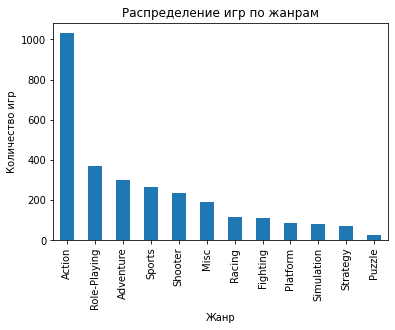

In [45]:
#построим график распределения игр по жанрам
data_filtered['genre'].value_counts().plot.bar()

plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Видим, что наибольшее количество игр продано в жанре Action с большим отрывом, на следующих местах месте Role-Playing, Adventure, Sports, не пользуются популярностью жанры Puzzle и Strategy

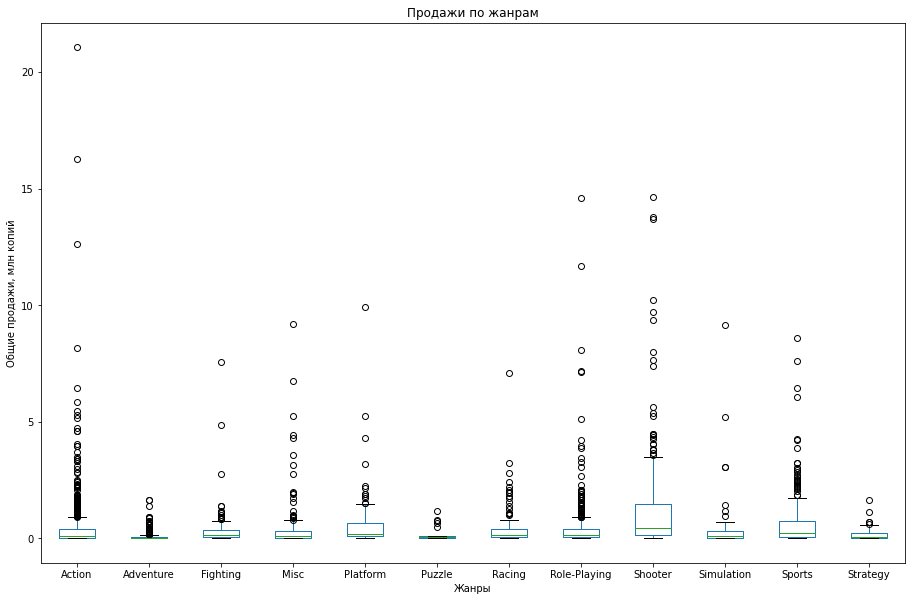

In [46]:
data_filtered.boxplot(by='genre', column =['total_sales'], grid = False, figsize=(15, 10)).get_figure().suptitle('').get_figure().gca().set_title('Продажи по жанрам')

plt.xlabel('Жанры')
plt.ylabel('Общие продажи, млн копий') 
plt.show()


Выведем масштабированную диаграмму размаха

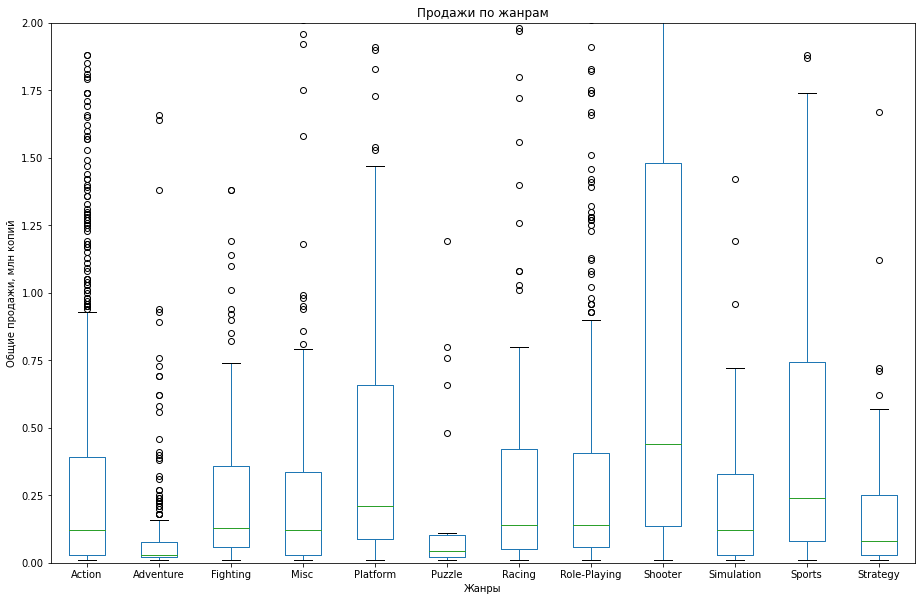

In [47]:
data_filtered.boxplot(by='genre', column =['total_sales'], grid = False, figsize=(15, 10)).get_figure().suptitle('').get_figure().gca().set_title('Продажи по жанрам')

plt.xlabel('Жанры')
plt.ylabel('Общие продажи, млн копий') 
plt.ylim(0, 2)
plt.show()

По графику можно выделить жанры с высокими показателями медианных продаж - Shooter, Sports, Platform. Эти жанры можно считать прибыльными, так как они показывают стабильный спрос в не зависимости от платформы. Низкие продажи можно увидеть по жанрам Puzzle и Adventure, Strategy.


## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Топ-5 платформ по регионам

По каждому из регионов найдем самые популярные платформы и опишем различия в долях продаж

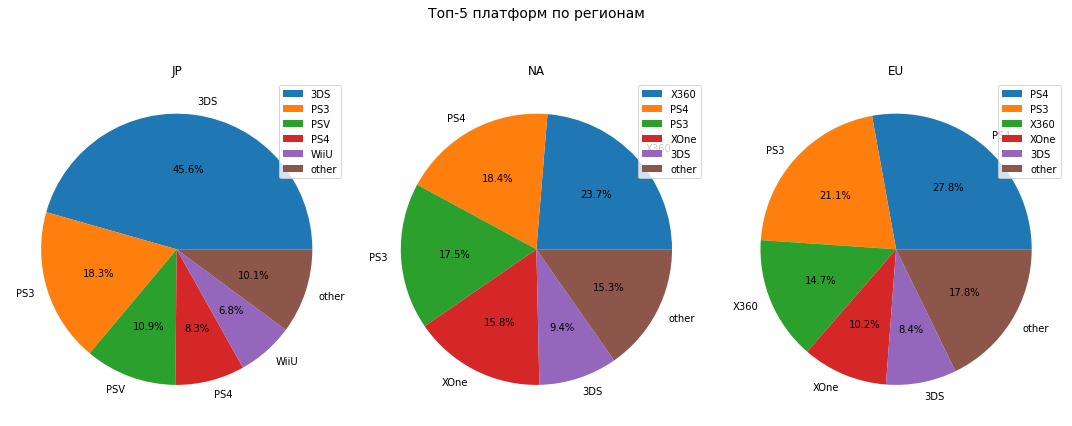

In [48]:
#построим график распределения продаж в регионах по платформам
regions = ['jp_sales', 'na_sales', 'eu_sales']

i = 1
fig, ax = plt.subplots()
fig.suptitle('Топ-5 платформ по регионам',fontsize=14)

for region in regions: 
    ax = plt.subplot(1, 3, i)
    player_platform = (
        data_filtered.pivot_table(index='platform', values=region, aggfunc='sum')
        .sort_values(by=region, ascending=False).reset_index()
    )

    other = pd.DataFrame({
        'platform' : ['other'],
        region : [player_platform[region][5:].sum()]
    })

    player_platform = player_platform[:5].append(other, ignore_index = True)
    player_platform.plot.pie(labels = player_platform['platform'], y = region, autopct='%.1f%%', figsize=(15, 15), ax=ax)
    ax.set_title(f'{region[:2].upper()}')
    ax.axes.yaxis.set_visible(False)
    i +=1 

fig.tight_layout()  
fig.subplots_adjust(top=1.5)
plt.show()  

На примере платформы X360 можем увидеть различия в предпочтениях по платформам в каждом регионе - в Северной Америке на X360 приходится 23,7% от общих продаж в регионе (1 место). В Европе - 14,7% (3 место) и в Японии - платформа не входит в топ-5.  

В Северной Америке и в Европе пользуются популярностью смежные платформы, например PS4, PS3 или X360, в то время как в Японии свой уникальный список, в котором платформы, перечисленные выше находятся на неприоритетных местах в списке. Также в Японии можно платформа 3DS занимает практически половину продаж в регионе, в то время как в Европе и Северной Америке продажи примерно равномерно поделены между топ-5 платформами. 

Такие различия можно связать с тем фактом, что в определенный период японский рынок задал вектор на продажу переносных игровых консолей - платформы WiiU, 3DS. В то время, как остальные регионы отдавали предпочтение домашним консолям. Также, на японском рынке почти не приносят прибыль игры, публикуемые иностранными платформами. 


### Топ-5 жанров по регионам

Определим самые популярные жанры по регионам и опишем разницу.

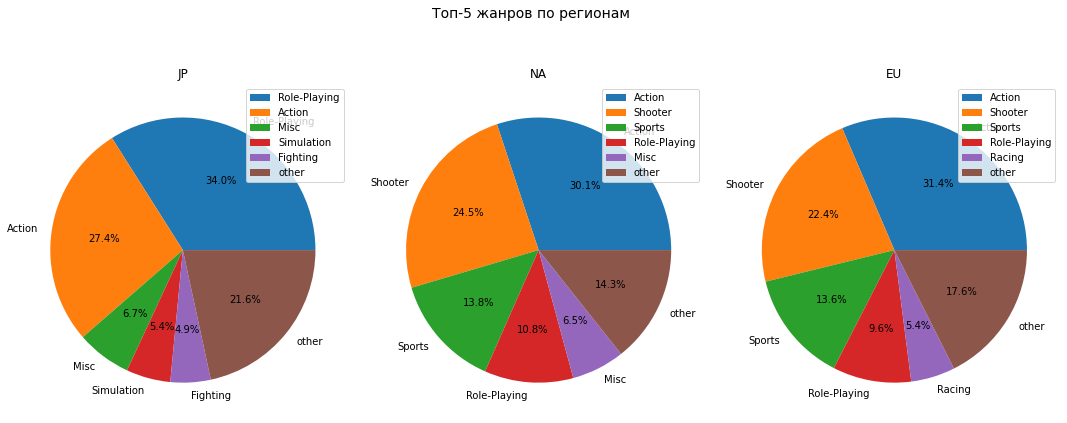

In [52]:
regions = ['jp_sales', 'na_sales', 'eu_sales']

i = 1
fig, ax = plt.subplots()
fig.suptitle('Топ-5 жанров по регионам',fontsize=14)

for region in regions: 
    ax = plt.subplot(1, 3, i)
    player_genre = (
        data_filtered.pivot_table(index='genre', values=region, aggfunc='sum')
        .sort_values(by=region, ascending=False).reset_index()
    )

    other = pd.DataFrame({
        'genre' : ['other'],
        region : [player_genre[region][5:].sum()]
    })

    player_genre = player_genre[:5].append(other, ignore_index = True)
    player_genre.plot.pie(labels = player_genre['genre'], y = region, autopct='%.1f%%', figsize=(15, 15), ax=ax)
    ax.set_title(f'{region[:2].upper()}')
    ax.axes.yaxis.set_visible(False)
    i +=1 

fig.tight_layout()  
fig.subplots_adjust(top=1.5)
plt.show()  

- Топ-5 жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc.
- Топ-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing.
- Топ-5 жанров в Японии: Role-playing, Action, Misc, Simulation, Fighting. 

Есть схожие жанры, пользующиеся популярностью во всех регионах - Action и Role-Playing.
В Северной Америке и Европе снова похожий список топ-5 самых популярных жанров в регионе, c примерно равными долями рынка, в то время как в Японии есть два выделяющихся жанра - Role-Playing и Action, 34% и 24,7%, остальные жанры остаются примерно с равными долями продаж Misc, Simulation Fighting - около 5%. 

Есть доводы о том, что история жанра игр Role-Playing в Японии началась с 80х годов и с тех пор является предпочтительным в этом регионе из-за таких характеристик, как: насыщенный сюжет, развитие героев и тд. 

В то время как в других регионах отдают предпочтение жанрам с "достижениями" - гоночные игры с соревновательными элементами или action с возможностью быть выше в рейтинге игроков. 

### Влияние рейтинга ESRB на продажи в отдельном регионе

#### Распределение продаж по рейтингу в регионах

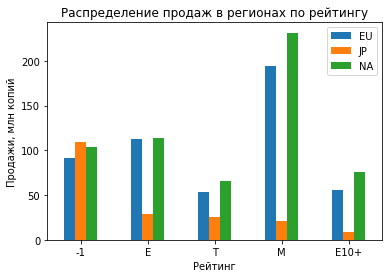

In [56]:
#построим распределение продаж в Японии по рейтингу ESRB
data_filtered.pivot_table(index='rating', values=['jp_sales', 'na_sales', 'eu_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot.bar()

plt.title('Распределение продаж в регионах по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн копий')
plt.legend(['EU','JP','NA'])
plt.xticks(rotation=0)
plt.show()

По распределению видим, игры с рейтингом ESRB хорошо продаются во всех регионах, кроме Японии. 
Игры же без рейтинга (значения заглушки -1) имеют самые высокие продажи в этом регионе. 
Этот факт можно обосновать тем, что рейтинг ESRB предназначен только для маркировки игр для США и Канады. 

Среди игр с рейтингом можно также выделить рейтинг M - для взрослых, с большим отрывом от другх видим продажи на 190-240 млн копий в Европе и Северной Америке. 
Далее по убыванию - рейтинг E (для всех возрастов) - с продажами по 100 млн копий и T (подросткам) с E10+ (Для всех от 10 лет и старше) - с продажами примерно 50-75 млн копий  

## Проверка гипотез


### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

**Первая гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза - эти рейтинги не равны

In [60]:
#создадим выборки для проведения t-теста, отфильтруем пропуски
xone_data = data_filtered.query('platform == "XOne" & user_score.isna() == False')
pc_data = data_filtered.query('platform == "PC" & user_score.isna() == False')


In [61]:
print(f'среднее первой выборки:{np.mean(xone_data["user_score"])}')

print(f'среднее второй выборки:{np.mean(pc_data["user_score"])}')

# задаем уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(
    xone_data['user_score'],
    pc_data['user_score'])

print('p-значение:', results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки:6.521428571428572
среднее второй выборки:6.4286407766990274
p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Для проверки гипотезы был использован двухвыборочный t-тест для независимых выборок. 
Полученное значение p-value больше заданного уровня значимости, поэтому можем подтвердить нулевую гипотезу.
Можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

### Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports 

**Вторая гипотеза**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковы

Альтернативная гипотеза - эти рейтинги не равны

In [62]:
#создадим выборки для проведения t-теста, отфильтруем пропуски
action_data = data_filtered.query('genre == "Action" & user_score.isna() == False')
sports_data = data_filtered.query('genre == "Sports" & user_score.isna() == False')

In [63]:
print(f'среднее первой выборки:{np.mean(action_data["user_score"])}')

print(f'среднее второй выборки:{np.mean(sports_data["user_score"])}')

# задаем уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
results = st.ttest_ind(
    action_data['user_score'],
    sports_data['user_score'])

print('p-значение:', results.pvalue)

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

среднее первой выборки:6.825047801147227
среднее второй выборки:5.455670103092784
p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Для проверки гипотезы был использован двухвыборочный t-тест для независимых выборок. 
Полученное значение p-value меньше заданного уровня значимости, поэтому можем отвергнуть нулевую гипотезу.
Можем сделать вывод, что гипотеза подтверждена и средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

В ходе проекта было необходимо по данным до 2016 года спланировать кампанию на 2017 год. 

1. По общей информации о датасете увидели большое количество пропусков в информации об отзывах критиков и пользователей, а также в рейтинге ESRB, нестандартный тип данных для года релиза игры и оценки пользователя. 


2. Обработали эти аномалии:
- привели год релиза к целым числам
- пропуски в оценках критиков и пользователей было решено оставить без изменений, значения 'tbd' были также заменены на пропуски для последующего анализа. 
- в рейтинге на пропущенные значения поставили заглушку, для проверки теории влияния рейтинга на продажи 

Были обнаружены неявные дубликаты (при проверке одновременно по названию игры, годе релиза и платформе), с разными значениями по продажам в регионе. Было принято решение объеденить продажи и устранить дубликаты. 

Заменили названия столбцов - привели к нижнему регистру - для наглядности и удобства. 

3. Был также проведен исследовательский анализ данных в разных разрезах:

- посмотрели, на распределение игр по годам, пришли к выводу, что компьютерные игры только набирали популярность в 80х-90х годах, были замечены несколько пиков на гистограмме - в 2002, 2008-2009 и в 2015 годах. В эти годы были запущены платформы Xbox, PS2, Wii, PS3, Xbox 360 и 3DS, их запуск способствовал росту продаж игр.

- посмотрели на динамику продаж по платформам, выбрали топ-5 платформ с наибольшими суммарными продажами: PS2, X360, PS3, Wii и DS, и построили по распределение по годам. Далее посчитав медианный срок жизни платформ, пришли к выводу, что примерно каждые 7 лет появляются новые и исчезают старые платформы

- выбрали за актуальный период данных -  2012-2016 года

- определили, что платформы X360, WiiU, XOne, PS4, PS3 имеют достаточно высокие значения медианных суммарных продаж, можно считать их потенциально прибыльными на следующий год, но также можем заметить общую тенденцию на спад продаж к 2016 году по всем платформам. 

- построили диаграмму размаха по глобальным продажам игр по потенциально прибыльным платформам, увидели схожее значение медиан, платформа X360 лидирует по значению квантиля 75%, то есть внутри достаточно большой разброс значений продаж - от медианного 0,31 до примерно 0,8 млн копий лежит 50-75% продаж на данной платформе. Платформа WiiU показывает стабильные значения, с малым количеством вбросов аномальных значений продаж. 

- проверили, существует ли влияние на продажи внутри платформы отзывов. Построили диаграммы рассеяния, посчитали показатели корреляции - между отзывами пользователей и продажами - 0,02, между отзывами критиков и продажами - 0,37

Сделали вывод, что между оценками пользователей/критиков и продажами игр на платформах есть слабая связь. Так как значение показателя корреляции для значений оценки критиков ближе к единице, можно сказать, что влияние критиков на продажи игр существеннее, чем оценки пользователей.
Проверили уровень корреляции на нескольких платформах, видим что это распространяется на все популярные платформы.
С уверенностью можно сказать, что больше продано игр с высокими оценками, есть отрывные значения с почти самыми высокими значениями оценок.
Следовательно можно сказать, что на популярных платформах будет продано большое количество игр с высокими оценками, в особенности оценками критиков и малое с невысокими оценками - то есть прибыль приносят высоко оцененные игры.

- построили график распределения игр по жанрам. По графику можно выделить жанры с высокими показателями медианных продаж - Shooter, Sports, Platform. Эти жанры можно считать прибыльными, так как они показывают стабильный спрос в не зависимости от платформы. Низкие продажи можно увидеть по жанрам Puzzle и Adventure, Strategy.

Видим, что наибольшее количество игр продано в жанре Action с большим отрывом, на следующих местах месте Role-Playing, Adventure, Sports, не пользуются популярностью жанры Puzzle и Strategy
Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. Определили для пользователя каждого региона:

- Топ-5 платформ в Северной Америке: X360, PS4, PS3, XOne, 3DS
- Топ-5 платформ в Европе:PS4, PS3, X360, XOne, 3DS
- Топ-5 платформ в Японии: 3DS, PS3, PSV, PS4, WiiU

На примере платформы X360 увидели различия в предпочтениях по платформам в каждом регионе - в Северной Америке на X360 приходится 23,7% от общих продаж в регионе (1 место). В Европе - 14,7% (3 место) и в Японии - платформа не входит в топ-5.  

В Северной Америке и в Европе пользуются популярностью смежные платформы, например PS4, PS3 или X360, в то время как в Японии свой уникальный список, в котором платформы, перечисленные выше находятся на неприоритетных местах в списке. Также в Японии можно платформа 3DS занимает практически половину продаж в регионе, в то время как в Европе и Северной Америке продажи примерно равномерно поделены между топ-5 платформами. 

Такие различия можно связать с тем фактом, что в определенный период японский рынок задал вектор на продажу переносных игровых консолей - платформы WiiU, 3DS. В то время, как остальные регионы отдавали предпочтение домашним консолям. Также, на японском рынке почти не приносят прибыль игры, публикуемые иностранными платформами. 

- Топ-5 жанров в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc.
- Топ-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing.
- Топ-5 жанров в Японии: Role-playing, Action, Misc, Simulation, Fighting. 

Есть схожие жанры, пользующиеся популярностью во всех регионах - Action и Role-Playing.
В Северной Америке и Европе снова похожий список топ-5 самых популярных жанров в регионе, c примерно равными долями рынка, в то время как в Японии есть два выделяющихся жанра - Role-Playing и Action, 34% и 24,7%, остальные жанры остаются примерно с равными долями продаж Misc, Simulation Fighting - около 5%. 

Есть доводы о том, что история жанра игр Role-Playing в Японии началась с 80х годов и с тех пор является предпочтительным в этом регионе из-за таких характеристик, как: насыщенный сюжет, развитие героев и тд. 

В то время как в других регионах отдают предпочтение жанрам с "достижениями" - гоночные игры с соревновательными элементами или action с возможностью быть выше в рейтинге игроков. 

- определили влияние рейтинга ESRB на продажи

По построенному графику увидели, что игры с рейтингом ESRB хорошо продаются во всех регионах, кроме Японии. 
Игры же без рейтинга (значения заглушки -1) имеют самые высокие продажи в этом регионе. 
Этот факт можно обосновать тем, что рейтинг ESRB предназначен только для маркировки игр для США и Канады. 

Среди игр с рейтингом можно также выделить рейтинг M - для взрослых, с большим отрывом от другх видим продажи на 190-240 млн копий в Европе и Северной Америке. 
Далее по убыванию - рейтинг E (для всех возрастов) - с продажами по 100 млн копий и T (подросткам) с E10+ (Для всех от 10 лет и старше) - с продажами примерно 50-75 млн копий  


5. Проверили две гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Для проверки гипотезы был использован двухвыборочный t-тест для независимых выборок. 
Полученное значение p-value больше заданного уровня значимости, поэтому подтвердили нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Для проверки гипотезы был использован двухвыборочный t-тест для независимых выборок. 
Полученное значение p-value меньше заданного уровня значимости, поэтому пришлось отвергнуть нулевую гипотезу.
Можем сделать вывод, что гипотеза подтверждена и средние пользовательские рейтинги жанров Action и Sports разные.


Если подвести итог, можно сказать, что на продажи игр влияет ее жанр, платформа, на которой она публикуется. 
Также, у разных регионов достаточно сильно различаются предпочтения по этим критериям, Япония в свою очередь имеет свои характерные отличия. 

Оценки критиков сильнее влияют на продажи игр, чем пользовательские, есть закономерность о продажах большего количества игр с высокими оценками. 


Для Японии можно порекомендовать рекламирование игр с жанром Role-playing, Action, обратить внимание на платформы 3DS, PS3, здесь больше продаются игры на переносных консолях, на платформах от местных компаний. Игры с рейтингом ESRB в этом регионе практически не продаются. 

Для Северной Америки можно порекомендовать продвижение игр с жанром Shooter, Action, обратить внимание на платформы X360, PS4, на этих платформах стабильные показатели медианных продаж. Здесь пользуются спросом игры с рейтингом ESRB M(для взрослых). 

В Европе можно продвигать игры также с жанром Shooter, Action, обратить внимание на платформы X360, PS4, со стабильными показателями медианных продаж. Здесь пользуются спросом игры с рейтингом ESRB M(для взрослых). 

Стоит обратить внимание на оценки критиков, игры с высокой оценкой с большой вероятностью будут лучше продаваться. 